In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [8]:
plt.rcParams['figure.figsize'] = [12, 6]
sns.set()

### The Dataset

The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

In [2]:
COLUMNS = [
    "age",              # (16,Inf]
    "workclass",        # Private Self-emp-not-inc Self-emp-inc Federal-gov Local-gov State-gov Without-pay Never-worked
    "fnlwgt",           # [-Inf,Inf]
    "education",        # Preschool 1st-4th 5th-6th 7th-8th 9th 10th 11th 12th HS-grad Assoc-acdm Assoc-voc Some-college Prof-school Bachelors Masters Doctorate
    "educational-num",  # [0,Inf]
    "marital-status",   # Married-civ-spouse Divorced Never-married Separated Widowed Married-spouse-absent Married-AF-spouse
    "occupation",       # Tech-support Craft-repair Other-service Sales Exec-managerial Prof-specialty Handlers-cleaners Machine-op-inspct Adm-clerical Farming-fishing Transport-moving Priv-house-serv Protective-serv Armed-Forces
    "relationship",     # Wife Own-child Husband Not-in-family Other-relative Unmarried
    "race",             # White Asian-Pac-Islander Amer-Indian-Eskimo Other Black
    "gender",           # Female Male
    "capital-gain",     # [0,Inf]
    "capital-loss",     # [0,Inf]
    "hours-per-week",   # [0,168]
    "native-country",   # United-States Cambodia England Puerto-Rico Canada Germany Outlying-US(Guam-USVI-etc) India Japan Greece South China Cuba Iran Honduras Philippines Italy Poland Jamaica Vietnam Mexico Portugal Ireland France Dominican-Republic Laos Ecuador Taiwan Haiti Columbia Hungary Guatemala Nicaragua Scotland Thailand Yugoslavia El-Salvador Trinadad&Tobago Peru Hong Holand-Netherlands
    "income"            # <=50K >50K
]

In [3]:
dataframe = pd.read_csv("./Dataset.data.gz", names=COLUMNS, sep=" ")
dataframe.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Exploratory Analysis

In [4]:
dataframe.shape

(48842, 15)

#### age

The age of an individual. Integer greater than 0.


Age statistics:

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64



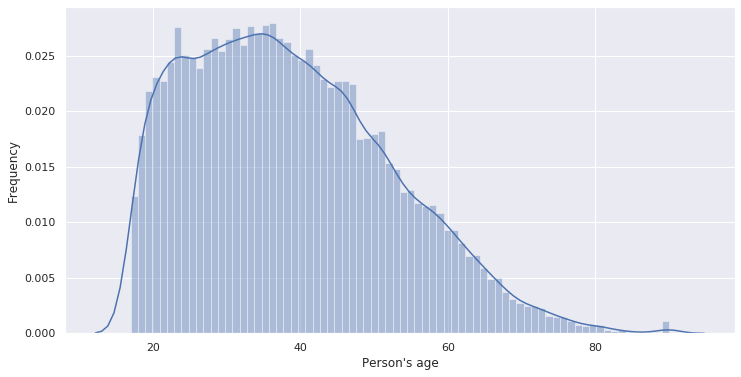

In [9]:
age = dataframe["age"]

print("\nAge statistics:\n\n", age.describe(), "\n", sep="")

ax = sns.distplot(age, bins=len(age.unique()))
_ = ax.set(xlabel="Person's age", ylabel="Frequency")

Person's age vs Income

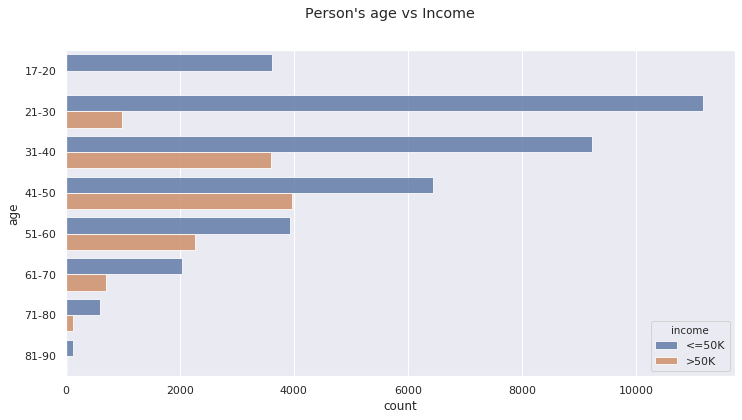

In [10]:
categorical_age = pd.cut(
    age, 
    bins=[16, 20, 30, 40, 50, 60, 70, 80, 90], 
    right=True,
    labels=["17-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90"]
)

data = pd.concat([categorical_age, dataframe["income"]], axis=1)

plt.suptitle("Person's age vs Income")
ax = sns.countplot(data=data, y="age", hue="income", alpha=0.8)


#### workclass

A general term to represent the employment status of an individual.

In [11]:
workclass = dataframe["workclass"]
counts = workclass.value_counts()

In [12]:
counts

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Workclass vs Income

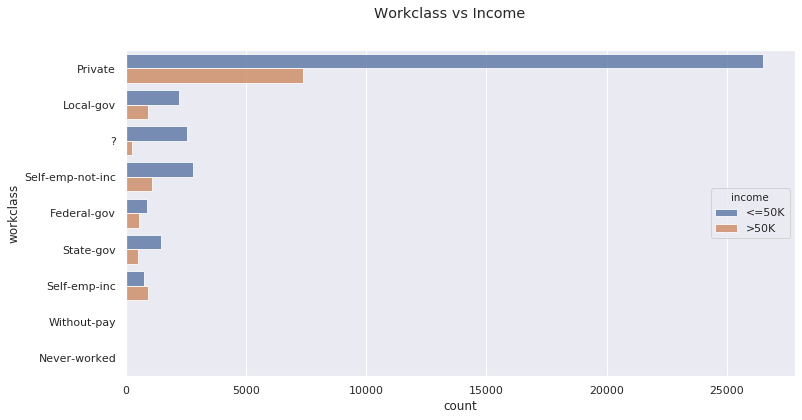

In [13]:
data = dataframe[["workclass", "income"]]

plt.suptitle("Workclass vs Income")
ax = sns.countplot(data=data, y="workclass", hue="income", alpha=0.8)


`Self-emp-inc` implies that the individual owns their own company, which is a category with an almost infinite ceiling when it comes to earnings.

#### fnlwgt

Final weight. In other words, this is the number of people the census believes the entry represents.
Integer greater than 0.


Final Weight statistics:

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64



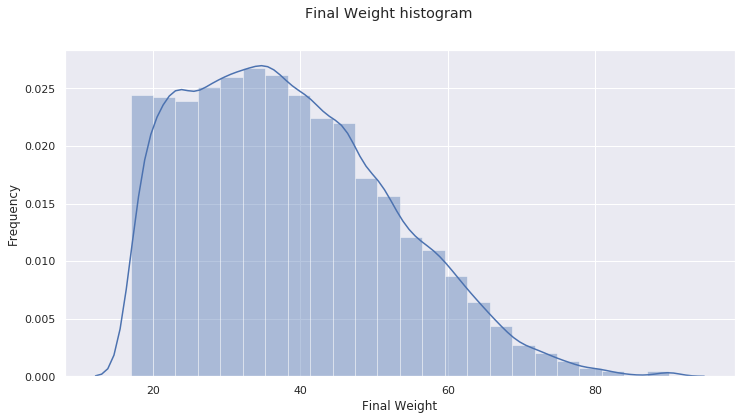

In [14]:
fnlwgt = dataframe["fnlwgt"]

print("\nFinal Weight statistics:\n\n", fnlwgt.describe(), "\n", sep="")

plt.suptitle("Final Weight histogram")
ax = sns.distplot(age, bins=24)
_ = ax.set(xlabel="Final Weight", ylabel="Frequency")

#### education

The highest level of education achieved by an individual.

In [15]:
education = dataframe["education"]
education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Highest Level of Education vs Income

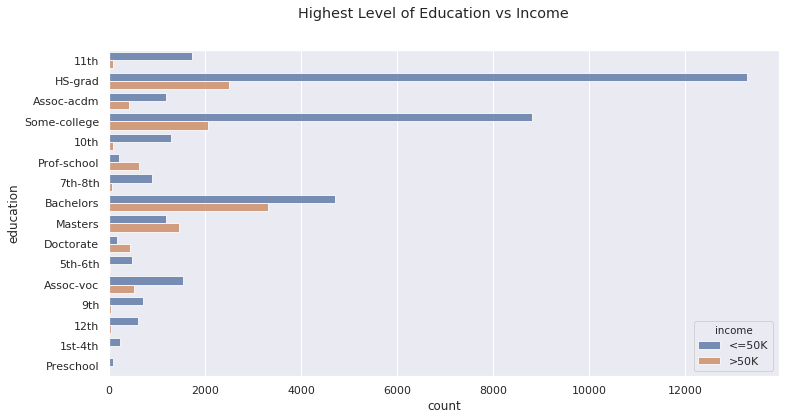

In [16]:
data = dataframe[["education", "income"]]

plt.suptitle("Highest Level of Education vs Income")
ax = sns.countplot(data=data, y="education", hue="income", alpha=0.8)


For the most part, a higher level of education is correlated to a higher percentage ofindividuals with the label >50k.

#### education-num

The highest level of education achieved in numerical form.

In [17]:
educational_num = dataframe["educational-num"]
educational_num.value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

#### marital-status

Marital status of an individual. `Married-civ-spouse` corresponds to acivilian spouse, while `Married-AF-spouse` is a spouse in the Armed Forces.

In [18]:
marital_status = dataframe["marital-status"]
marital_status.value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

Marital Status vs Income

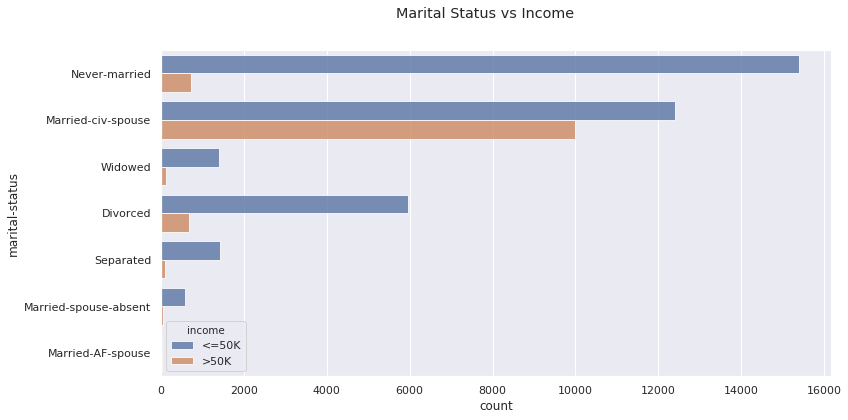

In [19]:
data = dataframe[["marital-status", "income"]]

plt.suptitle("Marital Status vs Income")
ax = sns.countplot(data=data, y="marital-status", hue="income", alpha=0.8)


#### ocupation

The general type of occupation of an individual.

In [20]:
occupation = dataframe["occupation"]
occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

Occupation vs Income

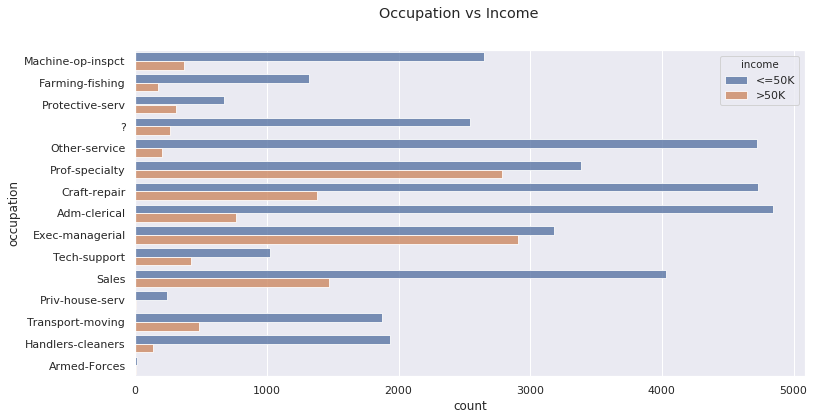

In [21]:
data = dataframe[["occupation", "income"]]

plt.suptitle("Occupation vs Income")
ax = sns.countplot(data=data, y="occupation", hue="income", alpha=0.8)


#### relationship

Represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. 

In [22]:
relationship = dataframe["relationship"]
relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

Relationship vs Income

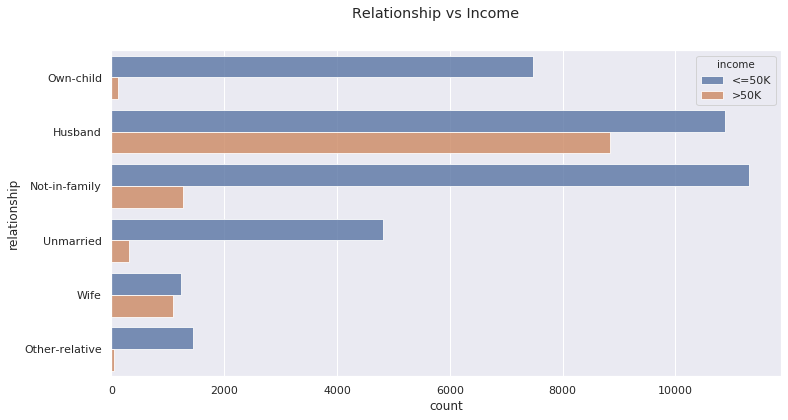

In [23]:
data = dataframe[["relationship", "income"]]

plt.suptitle("Relationship vs Income")
ax = sns.countplot(data=data, y="relationship", hue="income", alpha=0.8)


#### race

Descriptions of an individual’s race.

In [24]:
race = dataframe["race"]
race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

Race vs Income

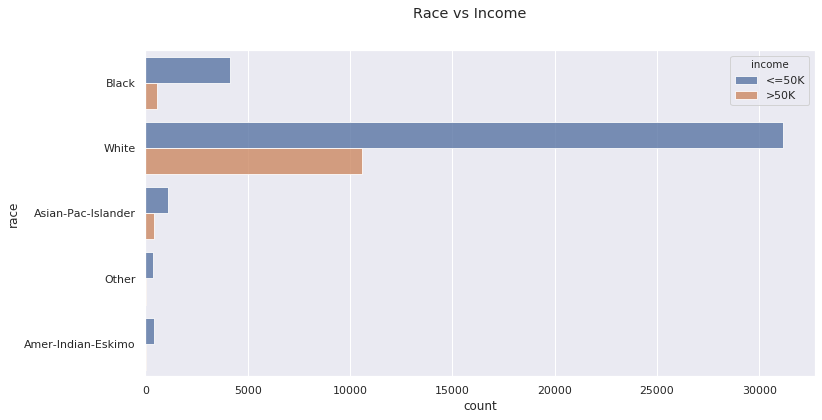

In [25]:
data = dataframe[["race", "income"]]

plt.suptitle("Race vs Income")
ax = sns.countplot(data=data, y="race", hue="income", alpha=0.8)


#### gender

The biological sex of the individual.

In [26]:
gender = dataframe["gender"]
gender.value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

Gender vs Income

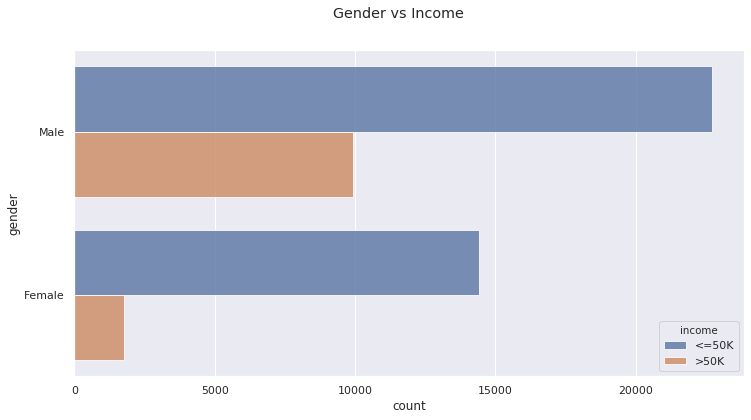

In [27]:
data = dataframe[["gender", "income"]]

plt.suptitle("Gender vs Income")
ax = sns.countplot(data=data, y="gender", hue="income", alpha=0.8)


The percentage of males who make greater than $50,000 is much greater than the percentage of females that make the same amount. This will certainly be a significant factor, and should be a feature considered in a prediction model.

#### capital-gain

Capital gain for an individual. Integer greater than or equal to 0.

In [28]:
capital_gain = dataframe["capital-gain"]
capital_gain.value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
2387         1
22040        1
6612         1
1111         1
1639         1
Name: capital-gain, Length: 123, dtype: int64

#### capital-loss

Capital loss for an individual. Integer greater than or equal to 0.

In [29]:
capital_loss = dataframe["capital-loss"]
capital_loss.value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
2489        1
2201        1
1421        1
1870        1
Name: capital-loss, Length: 99, dtype: int64

#### hours-per-week

The hours an individual has reported to work per week.

In [30]:
hours_per_week = dataframe["hours-per-week"]
hours_per_week.value_counts()

40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
94        1
79        1
82        1
87        1
Name: hours-per-week, Length: 96, dtype: int64

Hours per Week vs Income

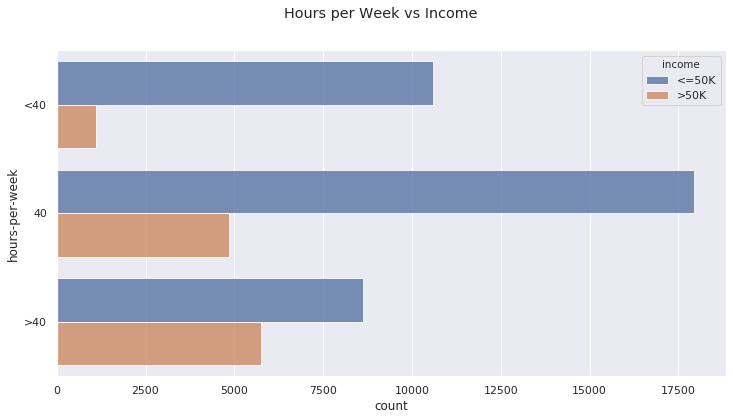

In [31]:
categorical_hours_per_week = pd.cut(
    hours_per_week, 
    bins=[min(hours_per_week) - 1, 39, 40, max(hours_per_week)], 
    right=True,
    labels=["<40", "40", ">40"]
)

data = pd.concat([categorical_hours_per_week, dataframe["income"]], axis=1)

plt.suptitle("Hours per Week vs Income")
ax = sns.countplot(data=data, y="hours-per-week", hue="income", alpha=0.8)


The percentage of individuals making over $50,000 drastically decreases when less than 40 hours per week, and increases significantly when greater than 40 hours per week.

#### native-country

Country of origin for an individual.

In [32]:
native_country = dataframe["native-country"]
native_country.value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                        

#### income

The label whether or not an individual makes more than $50,000 annually.

In [33]:
income = dataframe["income"]
income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

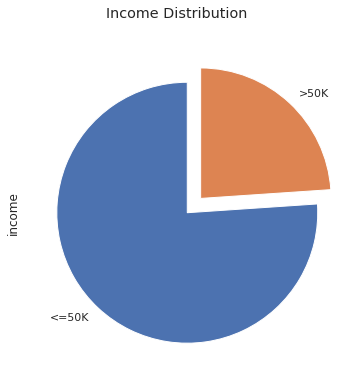

In [34]:
plt.suptitle("Income Distribution")
ax = income.value_counts().plot(kind="pie", startangle=90, explode=(0, 0.15))


### Prediction models

In [35]:
from scipy.sparse import hstack
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Data preprocessing:

In [36]:
encoder = OneHotEncoder()
label_encoder = LabelEncoder()

In [37]:
X = np.hstack((
    dataframe["age"].values.reshape(-1, 1),
    encoder.fit_transform(dataframe["education"].values.reshape(-1, 1)).toarray(),
    encoder.fit_transform(dataframe["marital-status"].values.reshape(-1, 1)).toarray(),
    encoder.fit_transform(dataframe["occupation"].values.reshape(-1, 1)).toarray(),
    encoder.fit_transform(dataframe["race"].values.reshape(-1, 1)).toarray(),
    encoder.fit_transform(dataframe["gender"].values.reshape(-1, 1)).toarray(),
    dataframe["capital-gain"].values.reshape(-1, 1),
    dataframe["capital-loss"].values.reshape(-1, 1),
    dataframe["hours-per-week"].values.reshape(-1, 1),
))

y = label_encoder.fit_transform(dataframe.income)

In [38]:
X.shape

(48842, 49)

In [39]:
y.shape

(48842,)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Dummy Model

In [41]:
from sklearn.dummy import DummyClassifier

model = DummyClassifier()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_predicted))
print("F1 score:", f1_score(y_test, y_predicted))

Accuracy score: 0.6420309141160815
F1 score: 0.24940974458038206


#### Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(15)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_predicted))
print("F1 score:", f1_score(y_test, y_predicted))

Accuracy score: 0.8574060804585935
F1 score: 0.67430441898527


#### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(min_samples_leaf=20)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_predicted))
print("F1 score:", f1_score(y_test, y_predicted))

Accuracy score: 0.8593510082915344
F1 score: 0.670028818443804


#### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(100, min_samples_leaf=20)
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_predicted))
print("F1 score:", f1_score(y_test, y_predicted))

Accuracy score: 0.8661070733954346
F1 score: 0.6746268656716418


### References

* http://www.cs.toronto.edu/~delve/data/adult/desc.html
* http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf